In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point

# Citizen Science Data Preparation
Data are divided in different files, mainly .csv and .shp files.

Shp files are collecting data about geographical information of species collected mainly by citizen scientists in different platforms.
- GBIFdata.shp: Shapefile from GBIF platform
- CO_UTM.shp: Shapefile descrubun 10x10 km grids in UTM coordinates

Csv files summarize de number of records by grid and platform (Data source)
- GBIF_summary.csv: Summary of records from different  by grid

### Load data files: spatial visualization
### Load Data Files: grid summarized records
This data base is collecting information about number of records by species and UTM grid cell in Cordoba province (Spain).  


## Spatial data visualization

In [2]:
# The databases are loaded with geopandas.
# import geopandas as gpd
# Upload the SHP file
# Detect the base directory of the project 
base_dir = os.path.dirname(os.getcwd()) 
# Build the path to the DATA folder
DATA_DIR = os.path.join(base_dir, "data")
gbif_df = gpd.read_file(os.path.join(DATA_DIR,"GBIFdata_CO.shp"))
CO_UTM_df = gpd.read_file(os.path.join(DATA_DIR,"CO_UTM2.shp")) 
# Show the first rows
print(gbif_df.head())
print(CO_UTM_df.head())


   myID        gbifID                                         references  \
0   1.0  9.224868e+08                                               None   
1   2.0  4.909300e+09  https://www.inaturalist.org/observations/22716...   
2   3.0  4.908755e+09  https://www.inaturalist.org/observations/22716...   
3   4.0  4.908754e+09  https://www.inaturalist.org/observations/22716...   
4   6.0  4.908559e+09  https://www.inaturalist.org/observations/22733...   

    institutio   institut_1 informatio dynamicPro  \
0  naturgucker         otro       None       None   
1  iNaturalist  iNaturalist       None       None   
2  iNaturalist  iNaturalist       None       None   
3  iNaturalist  iNaturalist       None       None   
4  iNaturalist  iNaturalist       None       None   

                                          occurrence  catalogNum  \
0                                               None  -690403403   
1  https://www.inaturalist.org/observations/22716...   227161605   
2  https://www.inatu

In [3]:
gbif_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   myID        1235 non-null   float64       
 1   gbifID      1235 non-null   float64       
 2   references  1169 non-null   object        
 3   institutio  1235 non-null   object        
 4   institut_1  1235 non-null   object        
 5   informatio  7 non-null      object        
 6   dynamicPro  58 non-null     object        
 7   occurrence  1232 non-null   object        
 8   catalogNum  1172 non-null   object        
 9   recordedBy  1235 non-null   object        
 10  individual  1134 non-null   float64       
 11  organismQu  52 non-null     float64       
 12  organism_1  62 non-null     object        
 13  sex         6 non-null      object        
 14  lifeStage   1145 non-null   object        
 15  occurren_1  1235 non-null   object        
 16  eventDate   1235

In [4]:
gbif_df.columns

Index(['myID', 'gbifID', 'references', 'institutio', 'institut_1',
       'informatio', 'dynamicPro', 'occurrence', 'catalogNum', 'recordedBy',
       'individual', 'organismQu', 'organism_1', 'sex', 'lifeStage',
       'occurren_1', 'eventDate', 'eventTime', 'startDayOf', 'endDayOfYe',
       'year', 'month', 'day', 'samplingPr', 'continent', 'countryCod',
       'decimalLat', 'decimalLon', 'coordinate', 'coordina_1', 'identifica',
       'dateIdenti', 'identifi_1', 'taxonID', 'scientific', 'order', 'family',
       'genus', 'genericNam', 'specificEp', 'infraspeci', 'cultivarEp',
       'taxonRank', 'vernacular', 'taxonomicS', 'datasetKey', 'issue',
       'mediaType', 'taxonKey', 'acceptedTa', 'species', 'acceptedSc',
       'verbatimSc', 'field_54', 'field_55', 'field_56', 'geometry'],
      dtype='object')

In [5]:
gbif_df.duplicated().sum()

np.int64(0)

<Axes: >

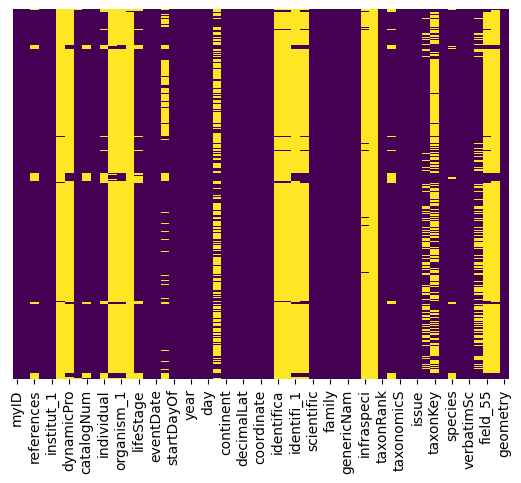

In [6]:
sns.heatmap(gbif_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [7]:

print("CRS de GBIF:", gbif_df.crs)
print("CRS de CO_UTM:", CO_UTM_df.crs)
#If you need to transform both to the same CRS 
gbif_df_3857 = gbif_df.to_crs("EPSG:3857")
CO_UTM_df_3857 = CO_UTM_df.to_crs("EPSG:3857")
# levels of a specific column
print(gbif_df.columns)
print(gbif_df["institut_1"].unique())  


CRS de GBIF: EPSG:4326
CRS de CO_UTM: EPSG:4326
Index(['myID', 'gbifID', 'references', 'institutio', 'institut_1',
       'informatio', 'dynamicPro', 'occurrence', 'catalogNum', 'recordedBy',
       'individual', 'organismQu', 'organism_1', 'sex', 'lifeStage',
       'occurren_1', 'eventDate', 'eventTime', 'startDayOf', 'endDayOfYe',
       'year', 'month', 'day', 'samplingPr', 'continent', 'countryCod',
       'decimalLat', 'decimalLon', 'coordinate', 'coordina_1', 'identifica',
       'dateIdenti', 'identifi_1', 'taxonID', 'scientific', 'order', 'family',
       'genus', 'genericNam', 'specificEp', 'infraspeci', 'cultivarEp',
       'taxonRank', 'vernacular', 'taxonomicS', 'datasetKey', 'issue',
       'mediaType', 'taxonKey', 'acceptedTa', 'species', 'acceptedSc',
       'verbatimSc', 'field_54', 'field_55', 'field_56', 'geometry'],
      dtype='object')
['otro' 'iNaturalist' 'Observation' 'iMammalia' None]


In [8]:
# import geopandas as gpd
# from shapely.geometry import Point
# Remove rows with null coordinates (if any)
# Active camera locations
cameras = pd.read_csv(os.path.join(DATA_DIR, 'locCam3.csv'), sep=';') #ojo con el separador
cameras.columns = cameras.columns.str.strip()  # Remove spaces in variable names
cameras_points = gpd.GeoDataFrame(
    cameras,
    geometry= [Point (xy) for xy in zip(cameras['Longitude'], cameras['Latitude'])],
    crs="EPSG:4326")
print(cameras_points.head())

   field_1    Nombre.Loc  Latitude  Longitude  Deer  Weasel  Marten  Genet  \
0        1     24-TRE-C1     37.94     -4.850     0       0       0      0   
1        6     24-TRE-C2     37.93     -4.849     0       0       0      0   
2        8  24_ALQU_C1_1     37.69     -4.882     0       0       0      0   
3        9  24_ALQU_C1_2     37.69     -4.883     0       0       0      0   
4       10  24_ALQU_C1_3     37.69     -4.882     0       0       0      0   

   Wild.Boar  Rabbit  ...  Dormouse  Moongoose  Shrew  Otter  Rat  Mouses  \
0          2       0  ...         0          0      0      0    0       0   
1          2       0  ...         0          0      0      0    0       0   
2          0       1  ...         0          1      0      0    0       0   
3          0       5  ...         0          0      0      0    0       0   
4          0      55  ...         0          3      0      0    0       0   

   Badger  Fox  Total.gene              geometry  
0       0    0   

<Axes: >

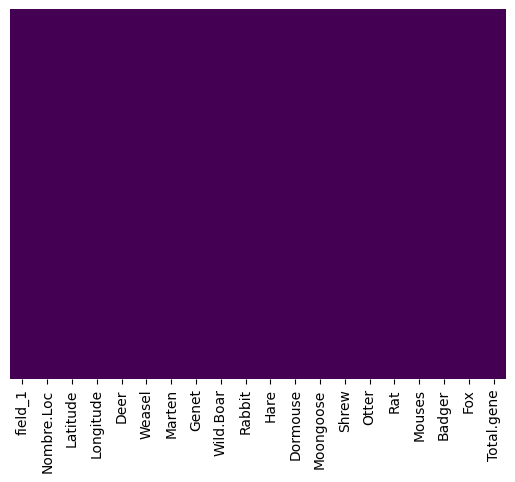

In [9]:
sns.heatmap(cameras.isnull(), cbar=False, yticklabels=False, cmap='viridis')

# GRID analysis

In [10]:
# summatory of grid records by data source
df = pd.read_csv(os.path.join(DATA_DIR,'dataset_CSsources.csv')) 

In [11]:
df.head()

,spp,sp,Grid,Platform,Records
0,O_cuniculus,O. cuniculus,UG18,GBIF,5
1,O_cuniculus,O. cuniculus,UG18,NoVal,34
2,O_cuniculus,O. cuniculus,UG18,seqRec,129
3,O_cuniculus,O. cuniculus,UG18,dailyRec,48
4,L_granatensis,L. granatensis,UG18,GBIF,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   spp       704 non-null    object
 1   sp        704 non-null    object
 2   Grid      704 non-null    object
 3   Platform  704 non-null    object
 4   Records   704 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 27.6+ KB


In [13]:
df.columns

Index(['spp', 'sp', 'Grid', 'Platform', 'Records'], dtype='object')

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# Change the levels directly for Platform Variable
df['Platform'] = df['Platform'].replace({
    'GBIF': 'Global Biodiversity',
    'NoVal': 'No Validation',
    'seqRec': 'Sequences Record',
    'dailyRec': 'Daily Record'
})

In [16]:
# Change the variabel name 'Platform' to 'Data Source'
df.rename(columns={'Platform': 'Data.Source'}, inplace=True)
df.rename(columns={'sp': 'Species.Name'}, inplace=True)
df.head()

,spp,Species.Name,Grid,Data.Source,Records
0,O_cuniculus,O. cuniculus,UG18,Global Biodiversity,5
1,O_cuniculus,O. cuniculus,UG18,No Validation,34
2,O_cuniculus,O. cuniculus,UG18,Sequences Record,129
3,O_cuniculus,O. cuniculus,UG18,Daily Record,48
4,L_granatensis,L. granatensis,UG18,Global Biodiversity,0


In [17]:
# Give me the unique values for the 'Species.Name' column
df['Species.Name'].unique()

array(['O. cuniculus', 'L. granatensis', 'G. genetta', 'H. icheneumon',
       'V. vulpes', 'L. lutra', 'M. foina', 'M. meles', 'M. nivalis',
       'S. scrofa', 'C. elaphus', 'E. europaeus', 'M. putorius',
       'C. pynernaica', 'S. vulgaris', 'E. quercinus'], dtype=object)

In [18]:
# Give me the unique values for the 'Grid' column
df['Grid'].unique()

array(['UG18', 'UG37', 'UG39', 'UG43', 'UG44', 'UG49', 'UG84', 'UG94',
       'UH26', 'UH30', 'UH40'], dtype=object)

<Axes: >

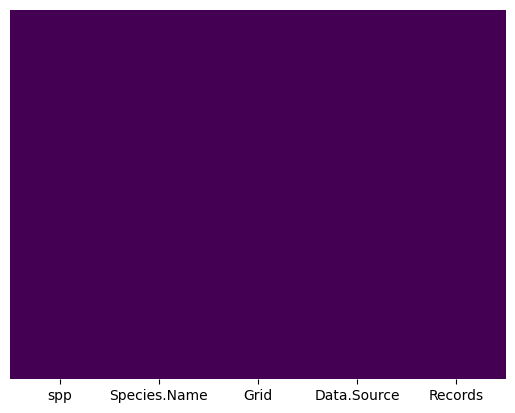

In [19]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

### daily and sequences records by species

In [20]:
# Filter by each type of data source 
df_daily = df[df['Data.Source'] == 'Daily Record']
df_sequences = df[df['Data.Source'] == 'Sequences Record']

# Group and sum the 'Records' column (or whichever column you want to sum).
daily_sum = df_daily.groupby('Species.Name')['Records'].sum().reset_index()
daily_sum.rename(columns={'Records': 'Daily_Sum'}, inplace=True)

sequences_sum = df_sequences.groupby('Species.Name')['Records'].sum().reset_index()
sequences_sum.rename(columns={'Records': 'Sequences_Sum'}, inplace=True)

# Combine both results by species
df_nspecies_grid = pd.merge(daily_sum, sequences_sum, on='Species.Name', how='outer').fillna(0)

print(df_nspecies_grid)

      Species.Name  Daily_Sum  Sequences_Sum
0       C. elaphus          2              3
1    C. pynernaica          0              0
2     E. europaeus          0              0
3     E. quercinus          5             10
4       G. genetta         55             65
5    H. icheneumon         30             35
6   L. granatensis         38             42
7         L. lutra          1              1
8         M. foina         26             36
9         M. meles         16             19
10      M. nivalis          1              1
11     M. putorius          0              0
12    O. cuniculus        199            700
13       S. scrofa         66            114
14     S. vulgaris          0              0
15       V. vulpes        150            224


In [ ]:
# Guardar modificaciones  de df
df.to_csv(os.path.join(DATA_DIR,'dataset_CSsources_mod.csv'), index=False)  

#### mejoras
year como variable integer

otros cambiar  a Others